In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import json
from SPARQLWrapper import SPARQLWrapper, JSON

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.metrics import classification_report,auc,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.wrappers.scikit_learn import KerasClassifier

%matplotlib inline

Using TensorFlow backend.
/Users/parisarezaie/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Features of Online News Dataset

In [5]:
feature_df1=['url',' timedelta',' n_tokens_title',' n_tokens_content',' n_unique_tokens',' n_non_stop_words',
' n_non_stop_unique_tokens',' num_hrefs',' num_self_hrefs',' num_imgs',' num_videos',' average_token_length',
' num_keywords',' data_channel_is_lifestyle',' data_channel_is_entertainment',' data_channel_is_bus',
' data_channel_is_socmed',' data_channel_is_tech',' data_channel_is_world',' kw_min_min',' kw_max_min']

In [2]:
feature_df2=['url',' kw_avg_min',' kw_min_max',' kw_max_max',' kw_avg_max',' kw_min_avg',' kw_max_avg',' kw_avg_avg',
' self_reference_min_shares',' self_reference_max_shares',' self_reference_avg_sharess',' weekday_is_monday',
' weekday_is_tuesday',' weekday_is_wednesday',' weekday_is_thursday',' weekday_is_friday',' weekday_is_saturday',
' weekday_is_sunday',' is_weekend',' LDA_00',' LDA_01']

In [3]:
feature_df3=['url',' LDA_02',' LDA_03',' LDA_04',' global_subjectivity',' global_sentiment_polarity',' global_rate_positive_words',
' global_rate_negative_words',' rate_positive_words',' rate_negative_words',' avg_positive_polarity',' min_positive_polarity',
' max_positive_polarity',' avg_negative_polarity',' min_negative_polarity',' max_negative_polarity',' title_subjectivity',
' title_sentiment_polarity',' abs_title_subjectivity',' abs_title_sentiment_polarity',' shares']

## Reading data fom Fuseki and converting to DataFrame_part1

In [9]:
%%time
sparql = SPARQLWrapper("http://localhost:3030/SW11/sparql")
queryString = """

SELECT DISTINCT ?s ?p ?o
WHERE {
    ?s ?p ?o .

}

"""
sparql.setQuery(queryString)
sparql.setReturnFormat(JSON)
results1 = sparql.query().convert()

CPU times: user 3.63 s, sys: 1.35 s, total: 4.98 s
Wall time: 20.6 s


## Counting triples

In [10]:
parsed1 = []
for entry in results1['results']['bindings']:
    for sparql_variable in entry.keys():
        parsed1.append({sparql_variable: entry[sparql_variable]['value']})
print('Query return ' + str(len(parsed1)) + ' results')        

Query return 2378640 results


## Converting Triples to dataFrame

In [11]:
%%time
df_tmp_1 = pd.DataFrame()

columnlists1 = dict()
for item in sorted(feature_df1):
    columnlists1[item.strip()] = []
    
for entry in results1['results']['bindings']:
    for sparql_variable in entry.keys():
        columnlists1[feature_df1[0].strip()].append(entry[u's']['value'])
            
for entry in results1['results']['bindings']:
    for sparql_variable in entry.keys():
        for item in sorted(feature_df1):
            if entry[u'p']['value'] == 'http://www.foo.org/'+item.strip():
                columnlists1[item.strip()].append(entry[u'o']['value'])
                #columnlists1[item.strip()].append(entry[u's']['value'])
            #columnlists1[feature_df1[0].strip()].append(entry[u's']['value'])

CPU times: user 20 s, sys: 248 ms, total: 20.3 s
Wall time: 21.5 s


In [12]:
for item in sorted(feature_df1):
     df_tmp_1[item.strip()]=pd.Series(columnlists1[item.strip()])
df_tmp_1.drop_duplicates(subset=None, keep='first', inplace=True)                

## Reading data fom Fuseki and converting to DataFrame_part2

In [13]:
%%time
from SPARQLWrapper import SPARQLWrapper, JSON
sparql = SPARQLWrapper("http://localhost:3030/SW12/sparql")
queryString = """

SELECT DISTINCT ?s ?p ?o
WHERE {
    ?s ?p ?o .

}

"""
sparql.setQuery(queryString)
sparql.setReturnFormat(JSON)
results2 = sparql.query().convert()

CPU times: user 3.86 s, sys: 2.67 s, total: 6.53 s
Wall time: 21.3 s


## Counting Triples

In [14]:
parsed2 = []
for entry in results2['results']['bindings']:
    for sparql_variable in entry.keys():
        parsed2.append({sparql_variable: entry[sparql_variable]['value']})
print('Query return ' + str(len(parsed2)) + ' results')        

Query return 2378640 results


## Converting Triples to DataFrame

In [15]:
%%time
df_tmp_2 = pd.DataFrame()

columnlists2 = dict()
for item in sorted(feature_df2):
    columnlists2[item.strip()] = []
    
for entry in results2['results']['bindings']:
    for sparql_variable in entry.keys():
        columnlists2[feature_df2[0].strip()].append(entry[u's']['value'])
            
for entry in results2['results']['bindings']:
    for sparql_variable in entry.keys():
        for item in sorted(feature_df2):
            if entry[u'p']['value'] == 'http://www.foo.org/'+item.strip():
                columnlists2[item.strip()].append(entry[u'o']['value'])

CPU times: user 19.7 s, sys: 218 ms, total: 19.9 s
Wall time: 20.4 s


In [16]:
for item in sorted(feature_df2):
     df_tmp_2[item.strip()]=pd.Series(columnlists2[item.strip()])
df_tmp_2.drop_duplicates(subset=None, keep='first', inplace=True)                

## Reading data fom Fuseki and converting to DataFrame_part3

In [17]:
%%time
from SPARQLWrapper import SPARQLWrapper, JSON
sparql = SPARQLWrapper("http://localhost:3030/SW13/sparql")
queryString = """

SELECT DISTINCT ?s ?p ?o
WHERE {
    ?s ?p ?o .

}

"""
sparql.setQuery(queryString)
sparql.setReturnFormat(JSON)
results3 = sparql.query().convert()

CPU times: user 5.31 s, sys: 5.4 s, total: 10.7 s
Wall time: 27.2 s


## Counting Triples

In [18]:
parsed3 = []
for entry in results3['results']['bindings']:
    for sparql_variable in entry.keys():
        parsed3.append({sparql_variable: entry[sparql_variable]['value']})
print('Query return ' + str(len(parsed3)) + ' results') 

Query return 2378640 results


## Converting Triples to DataFrame

In [19]:
%%time
df_tmp_3 = pd.DataFrame()

columnlists3 = dict()
for item in sorted(feature_df3):
    columnlists3[item.strip()] = []
    
for entry in results3['results']['bindings']:
    for sparql_variable in entry.keys():
        columnlists3[feature_df3[0].strip()].append(entry[u's']['value'])
            
for entry in results3['results']['bindings']:
    for sparql_variable in entry.keys():
        for item in sorted(feature_df3):
            if entry[u'p']['value'] == 'http://www.foo.org/'+item.strip():
                columnlists3[item.strip()].append(entry[u'o']['value'])

CPU times: user 19.5 s, sys: 133 ms, total: 19.6 s
Wall time: 19.9 s


In [20]:
for item in sorted(feature_df3):
     df_tmp_3[item.strip()]=pd.Series(columnlists3[item.strip()])
df_tmp_3.drop_duplicates(subset=None, keep='first', inplace=True)                

## Concatinate 3 parts of Dataframe to one 

In [21]:
df_tmp_1.reset_index(drop=True, inplace=True)
df_tmp_2.reset_index(drop=True, inplace=True)
df_tmp_3.reset_index(drop=True, inplace=True)

df_main = pd.concat([df_tmp_1,df_tmp_2,df_tmp_3],axis=1)
df_main.drop(['url'],axis=1,inplace=True)
df_tmp=df_main.astype('float')

## Showing the head of DataFrame

In [22]:
df_tmp.head()

,average_token_length,data_channel_is_bus,data_channel_is_entertainment,data_channel_is_lifestyle,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_max_min,kw_min_min,n_non_stop_unique_tokens,...,global_subjectivity,max_negative_polarity,max_positive_polarity,min_negative_polarity,min_positive_polarity,rate_negative_words,rate_positive_words,shares,title_sentiment_polarity,title_subjectivity
0,4.720395,0.0,0.0,0.0,0.0,0.0,0.0,530.0,4.0,0.691943,...,0.585143,-0.066667,1.0,-0.500000,0.100000,0.347826,0.652174,2700.0,-0.066667,0.6
1,4.923646,0.0,0.0,0.0,1.0,0.0,0.0,2000.0,4.0,0.668033,...,0.370909,-0.100000,1.0,-0.500000,0.033333,0.310345,0.689655,1500.0,0.000000,0.0
2,4.885196,0.0,1.0,0.0,0.0,0.0,0.0,910.0,-1.0,0.593750,...,0.349447,-0.155556,0.8,-0.166667,0.100000,0.166667,0.833333,986.0,0.000000,0.0
3,4.700146,1.0,0.0,0.0,0.0,0.0,0.0,444.0,4.0,0.661765,...,0.433588,-0.150000,1.0,-0.500000,0.100000,0.175000,0.825000,1700.0,0.000000,0.0
4,4.817174,0.0,0.0,0.0,0.0,0.0,1.0,11000.0,-1.0,0.772947,...,0.396504,-0.187500,0.6,-0.600000,0.100000,0.150000,0.850000,2600.0,0.000000,0.0


## Finding the Treshold of Shares for Converting Target Values to Binary Classification

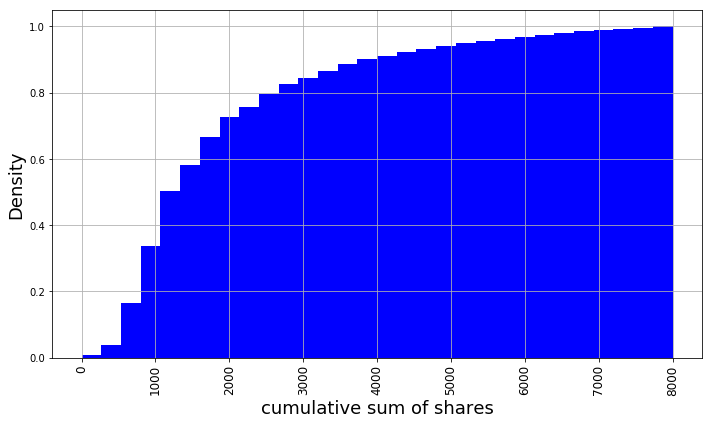

In [23]:
plt.figure(figsize=(10,6))
plt.hist(df_tmp['shares'],color='b',bins=30,range=[0,8000],density=True,cumulative=True)
plt.xticks(rotation=90,size=12)
plt.ylabel('Density',size=18)
plt.xlabel('cumulative sum of shares',size=18)
plt.grid()
plt.tight_layout()
plt.savefig('./shares.pdf')

## Function for Converting Target Values to labels for classification

In [24]:
def shares_to_labels(a):
    """
    A function to read targer i.e. 
    share values and those below 1300 shares 
    are turned to class 0, and above 1300 are
    lablelled as class 1.
    """
    if -1<a<1300.0:
        l=0
    else:
        l=1
    return l

In [25]:
df_tmp['shares_label'] = df_tmp['shares'].apply(shares_to_labels)

## Data set after adding lable

In [26]:
df_tmp.head()

,average_token_length,data_channel_is_bus,data_channel_is_entertainment,data_channel_is_lifestyle,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_max_min,kw_min_min,n_non_stop_unique_tokens,...,max_negative_polarity,max_positive_polarity,min_negative_polarity,min_positive_polarity,rate_negative_words,rate_positive_words,shares,title_sentiment_polarity,title_subjectivity,shares_label
0,4.720395,0.0,0.0,0.0,0.0,0.0,0.0,530.0,4.0,0.691943,...,-0.066667,1.0,-0.500000,0.100000,0.347826,0.652174,2700.0,-0.066667,0.6,1
1,4.923646,0.0,0.0,0.0,1.0,0.0,0.0,2000.0,4.0,0.668033,...,-0.100000,1.0,-0.500000,0.033333,0.310345,0.689655,1500.0,0.000000,0.0,1
2,4.885196,0.0,1.0,0.0,0.0,0.0,0.0,910.0,-1.0,0.593750,...,-0.155556,0.8,-0.166667,0.100000,0.166667,0.833333,986.0,0.000000,0.0,0
3,4.700146,1.0,0.0,0.0,0.0,0.0,0.0,444.0,4.0,0.661765,...,-0.150000,1.0,-0.500000,0.100000,0.175000,0.825000,1700.0,0.000000,0.0,1
4,4.817174,0.0,0.0,0.0,0.0,0.0,1.0,11000.0,-1.0,0.772947,...,-0.187500,0.6,-0.600000,0.100000,0.150000,0.850000,2600.0,0.000000,0.0,1


In [27]:
df=df_tmp
df.drop('shares',axis=1,inplace=True)

In [28]:
df.head()

,average_token_length,data_channel_is_bus,data_channel_is_entertainment,data_channel_is_lifestyle,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_max_min,kw_min_min,n_non_stop_unique_tokens,...,global_subjectivity,max_negative_polarity,max_positive_polarity,min_negative_polarity,min_positive_polarity,rate_negative_words,rate_positive_words,title_sentiment_polarity,title_subjectivity,shares_label
0,4.720395,0.0,0.0,0.0,0.0,0.0,0.0,530.0,4.0,0.691943,...,0.585143,-0.066667,1.0,-0.500000,0.100000,0.347826,0.652174,-0.066667,0.6,1
1,4.923646,0.0,0.0,0.0,1.0,0.0,0.0,2000.0,4.0,0.668033,...,0.370909,-0.100000,1.0,-0.500000,0.033333,0.310345,0.689655,0.000000,0.0,1
2,4.885196,0.0,1.0,0.0,0.0,0.0,0.0,910.0,-1.0,0.593750,...,0.349447,-0.155556,0.8,-0.166667,0.100000,0.166667,0.833333,0.000000,0.0,0
3,4.700146,1.0,0.0,0.0,0.0,0.0,0.0,444.0,4.0,0.661765,...,0.433588,-0.150000,1.0,-0.500000,0.100000,0.175000,0.825000,0.000000,0.0,1
4,4.817174,0.0,0.0,0.0,0.0,0.0,1.0,11000.0,-1.0,0.772947,...,0.396504,-0.187500,0.6,-0.600000,0.100000,0.150000,0.850000,0.000000,0.0,1


## Support Vector Machine Algorithm

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(u'shares_label',axis=1), 
                                                     df[u'shares_label'], test_size=0.25,shuffle=True)

## Standard Scaling prior to SVM fit


In [30]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Gridsearch to find best Kernel and C parameter

In [31]:
%%time
svc = svm.SVC()
parameter_opt = {'kernel':['rbf'],'C':[1]}

clf = GridSearchCV(svc, param_grid=parameter_opt,cv=4,verbose=2)
clf.fit(X_train, y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=  57.6s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV] .................................. C=1, kernel=rbf, total=  56.3s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=  55.2s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=  55.3s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  5.4min finished


CPU times: user 6min 58s, sys: 2.3 s, total: 7min
Wall time: 7min 3s


## Result after training with best parameters

In [33]:
print('Best score for data1:', clf.best_score_) 

Best score for data1: 0.671139810984


In [35]:
print("Detailed classification report for C-SVM:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full test set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

Detailed classification report for C-SVM:

The model is trained on the full development set.
The scores are computed on the full test set.

             precision    recall  f1-score   support

          0       0.63      0.56      0.59      4149
          1       0.71      0.76      0.73      5762

avg / total       0.68      0.68      0.68      9911



### Neural Network Algorithm: Multilayer perceptron(MLP)

In [36]:
Train=df.sample(frac=0.8,axis=0)
Test=df.drop(Train.index)

X_train_nn, X_valid_nn, y_train_nn, y_valid_nn = train_test_split(Train.drop(u'shares_label',axis=1), 
                                                     Train[u'shares_label'], test_size=0.25,shuffle=True)

scaler = StandardScaler()
scaler.fit(X_train_nn)

X_train_nn = scaler.transform(X_train_nn)
X_valid_nn = scaler.transform(X_valid_nn)

X_test_nn = scaler.transform(Test.drop(u'shares_label',axis=1))
y_test_nn=Test[u'shares_label']

In [37]:
X_train_nn.shape

(23786, 59)

## Design Neural network layers and perceptrones with regularization

In [38]:
model = Sequential()
model.add(Dense(32, input_dim=59, kernel_initializer='normal', activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
history=model.fit(X_train_nn, y_train_nn, epochs=200, batch_size=128,validation_data=(X_valid_nn, y_valid_nn))

Train on 23786 samples, validate on 7929 samples
Epoch 1/200
23786/23786 [==============================] - 1s 33us/step - loss: 0.6500 - acc: 0.6179 - val_loss: 0.6186 - val_acc: 0.6582
Epoch 2/200
23786/23786 [==============================] - 0s 14us/step - loss: 0.6247 - acc: 0.6574 - val_loss: 0.6130 - val_acc: 0.6663
Epoch 3/200
23786/23786 [==============================] - 0s 14us/step - loss: 0.6213 - acc: 0.6574 - val_loss: 0.6106 - val_acc: 0.6677
Epoch 4/200
23786/23786 [==============================] - 0s 14us/step - loss: 0.6180 - acc: 0.6609 - val_loss: 0.6092 - val_acc: 0.6686
Epoch 5/200
23786/23786 [==============================] - 0s 18us/step - loss: 0.6169 - acc: 0.6627 - val_loss: 0.6077 - val_acc: 0.6715
Epoch 6/200
23786/23786 [==============================] - 0s 16us/step - loss: 0.6171 - acc: 0.6631 - val_loss: 0.6087 - val_acc: 0.6707
Epoch 7/200
23786/23786 [==============================] - 0s 14us/step - loss: 0.6149 - acc: 0.6642 - val_loss: 0.6060 - v

Epoch 118/200
23786/23786 [==============================] - 0s 12us/step - loss: 0.6036 - acc: 0.6756 - val_loss: 0.5981 - val_acc: 0.6765
Epoch 119/200
23786/23786 [==============================] - 0s 12us/step - loss: 0.6020 - acc: 0.6735 - val_loss: 0.5989 - val_acc: 0.6760
Epoch 120/200
23786/23786 [==============================] - 0s 12us/step - loss: 0.6029 - acc: 0.6700 - val_loss: 0.5969 - val_acc: 0.6778
Epoch 121/200
23786/23786 [==============================] - 0s 12us/step - loss: 0.6021 - acc: 0.6732 - val_loss: 0.5976 - val_acc: 0.6769
Epoch 122/200
23786/23786 [==============================] - 0s 12us/step - loss: 0.6008 - acc: 0.6739 - val_loss: 0.5982 - val_acc: 0.6764
Epoch 123/200
23786/23786 [==============================] - 0s 12us/step - loss: 0.6007 - acc: 0.6752 - val_loss: 0.5973 - val_acc: 0.6751
Epoch 124/200
23786/23786 [==============================] - 0s 12us/step - loss: 0.6008 - acc: 0.6730 - val_loss: 0.5968 - val_acc: 0.6788
Epoch 125/200
23786/

In [40]:
history_dict=history.history
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## Comparing Training and Validation loss

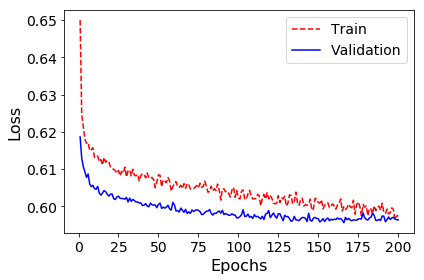

In [41]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'r--',label='Train')
plt.plot(epochs, val_loss_values, 'b-',label='Validation')
plt.legend(fontsize=14)
plt.yticks(size=14)
plt.xticks(size=14)
plt.xlabel('Epochs',size=16)
plt.ylabel('Loss',size=16)
plt.tight_layout()
#plt.savefig('./shares.pdf')


In [42]:
y_pred_nn=model.predict_classes(X_test_nn)

## Results after training with Neural Nets

In [43]:
print("Detailed classification report for Neural Network:")
print()
print(classification_report(y_test_nn, y_pred_nn))

Detailed classification report for Neural Network:

             precision    recall  f1-score   support

          0       0.64      0.50      0.56      3387
          1       0.68      0.79      0.73      4542

avg / total       0.66      0.67      0.66      7929



In [44]:
print('Compute Area Under the Curve (AUC)', roc_auc_score(y_test_nn, y_pred_nn))

Compute Area Under the Curve (AUC) 0.644200726299


## Accuracy plot after Epochs

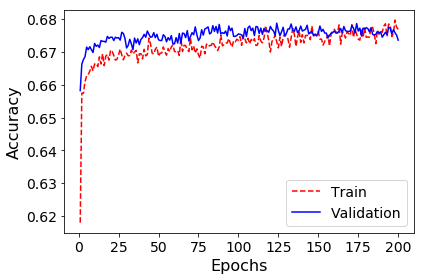

In [45]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'r--',label='Train')
plt.plot(epochs, val_acc_values, 'b-',label='Validation')
plt.legend(fontsize=14)
plt.yticks(size=14)
plt.xticks(size=14)
plt.xlabel('Epochs',size=16)
plt.ylabel('Accuracy',size=16)
plt.tight_layout()